# Hot Delivery - Part IV
Team 3

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pulp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import datetime


# Initialize seaborn (for plotting)
sns.set()

### Load Data for Clustering

In [ ]:
dfOrders=pd.read_csv('part4_large.csv')
dfDrivers=pd.read_csv('part4_drivers.csv')

In [ ]:
dfOrders

,restaurant,customer,estimated availability
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 5:17 PM
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 6:17 PM
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 5:53 PM
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 5:24 PM
5,Downtown Toronto (Rosedale),Downtown Toronto (CN Tower / King and Spadina ...,2022-04-02 7:35 PM
6,Downtown Toronto (Regent Park / Port of Toronto),Downtown Toronto (Toronto Dominion Centre / De...,2022-04-02 6:21 PM
7,Downtown Toronto (St. James Town / Cabbagetown),York (Runnymede / The Junction North),2022-04-02 5:10 PM
8,Downtown Toronto (Underground city),Central Toronto (Summerhill West / Rathnelly /...,2022-04-02 5:21 PM
9,Downtown Toronto (Church and Wellesley),East Toronto (The Danforth West / Riverdale),2022-04-02 7:21 PM


In [ ]:
dfDrivers

,start region,velocity
0,Downtown Toronto (Richmond / Adelaide / King),20
1,Downtown Toronto (St. James Park),20
2,Downtown Toronto (Church and Wellesley),20
3,Downtown Toronto (Christie),20
4,Downtown Toronto (Church and Wellesley),20
5,Downtown Toronto Stn A PO Boxes 25 The Esplana...,20
6,Downtown Toronto (CN Tower / King and Spadina ...,20
7,Downtown Toronto (Rosedale),20
8,Downtown Toronto (University of Toronto / Harb...,20
9,Downtown Toronto (Ryerson),20


In [ ]:
dfDistance = pd.read_csv("distances.csv")
dfDistance

,origin,destination,distance
0,Scarborough (Malvern / Rouge River),Scarborough (Rouge Hill / Port Union / Highlan...,3.931478
1,Scarborough (Malvern / Rouge River),Scarborough (Guildwood / Morningside / Ellesmere),4.864191
2,Scarborough (Malvern / Rouge River),Scarborough (Woburn),4.778347
3,Scarborough (Malvern / Rouge River),Scarborough (Cedarbrae),6.009861
4,Scarborough (Malvern / Rouge River),Scarborough (Eglinton),7.876162
...,...,...,...
10297,Etobicoke (South Steeles / Silverstone / Humbe...,Etobicoke (Westmount),6.971037
10298,Etobicoke Northwest (Clairville / Humberwood /...,Etobicoke (Westmount),5.185601
10299,Etobicoke (South Steeles / Silverstone / Humbe...,Etobicoke (Kingsview Village / St. Phillips / ...,6.390667
10300,Etobicoke Northwest (Clairville / Humberwood /...,Etobicoke (Kingsview Village / St. Phillips / ...,3.793723


In [ ]:
dfRegions=pd.read_csv('regions.csv')
dfRegions

,name,province,code,latitude,longitude
0,Scarborough (Malvern / Rouge River),Ontario,M1B,43.8113,-79.1930
1,Scarborough (Rouge Hill / Port Union / Highlan...,Ontario,M1C,43.7878,-79.1564
2,Scarborough (Guildwood / Morningside / Ellesmere),Ontario,M1E,43.7678,-79.1866
3,Scarborough (Woburn),Ontario,M1G,43.7712,-79.2144
4,Scarborough (Cedarbrae),Ontario,M1H,43.7686,-79.2389
...,...,...,...,...,...
97,Weston,Ontario,M9N,43.7068,-79.5170
98,Etobicoke (Westmount),Ontario,M9P,43.6949,-79.5323
99,Etobicoke (Kingsview Village / St. Phillips / ...,Ontario,M9R,43.6898,-79.5582
100,Etobicoke (South Steeles / Silverstone / Humbe...,Ontario,M9V,43.7432,-79.5876


### K Mean Clustering

In [ ]:
#find the long lat for each restaurant in the orders
df_1=dfOrders.copy()
df_1=df_1.rename(columns={'restaurant':'name'})
df_1=pd.merge(df_1,dfRegions[['name','latitude','longitude']],on='name',how='left')
df_1

,name,customer,estimated availability,latitude,longitude
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 5:17 PM,43.6564,-79.3860
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM,43.6683,-79.4205
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 6:17 PM,43.6572,-79.3783
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 5:53 PM,43.6513,-79.3756
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 5:24 PM,43.6541,-79.3978
5,Downtown Toronto (Rosedale),Downtown Toronto (CN Tower / King and Spadina ...,2022-04-02 7:35 PM,43.6827,-79.3730
6,Downtown Toronto (Regent Park / Port of Toronto),Downtown Toronto (Toronto Dominion Centre / De...,2022-04-02 6:21 PM,43.6555,-79.3626
7,Downtown Toronto (St. James Town / Cabbagetown),York (Runnymede / The Junction North),2022-04-02 5:10 PM,43.6684,-79.3689
8,Downtown Toronto (Underground city),Central Toronto (Summerhill West / Rathnelly /...,2022-04-02 5:21 PM,43.6492,-79.3823
9,Downtown Toronto (Church and Wellesley),East Toronto (The Danforth West / Riverdale),2022-04-02 7:21 PM,43.6656,-79.3830


In [ ]:
df_1['estimated availability'] = pd.to_datetime(df_1['estimated availability'])
df_1

,name,customer,estimated availability,latitude,longitude
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 17:17:00,43.6564,-79.3860
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 17:49:00,43.6683,-79.4205
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 18:17:00,43.6572,-79.3783
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 17:53:00,43.6513,-79.3756
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 17:24:00,43.6541,-79.3978
5,Downtown Toronto (Rosedale),Downtown Toronto (CN Tower / King and Spadina ...,2022-04-02 19:35:00,43.6827,-79.3730
6,Downtown Toronto (Regent Park / Port of Toronto),Downtown Toronto (Toronto Dominion Centre / De...,2022-04-02 18:21:00,43.6555,-79.3626
7,Downtown Toronto (St. James Town / Cabbagetown),York (Runnymede / The Junction North),2022-04-02 17:10:00,43.6684,-79.3689
8,Downtown Toronto (Underground city),Central Toronto (Summerhill West / Rathnelly /...,2022-04-02 17:21:00,43.6492,-79.3823
9,Downtown Toronto (Church and Wellesley),East Toronto (The Danforth West / Riverdale),2022-04-02 19:21:00,43.6656,-79.3830


In [ ]:
import keras
from matplotlib import pyplot
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

In [ ]:
df_2=df_1.copy()
df_2=df_2.drop(columns=['name','customer','estimated availability'])

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_2)
#Converting the numpy array into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head(5)

,0,1
0,0.214925,0.595855
1,0.570149,0.000000
2,0.238806,0.728843
3,0.062687,0.775475
4,0.146269,0.392055


In [ ]:
scaled_df.columns=['latitude','longitude']

In [ ]:
x_array = scaled_df.values
x_array

array([[0.21492537, 0.59585492],
       [0.57014925, 0.        ],
       [0.23880597, 0.72884283],
       [0.06268657, 0.77547496],
       [0.14626866, 0.39205527],
       [1.        , 0.82037997],
       [0.1880597 , 1.        ],
       [0.57313433, 0.89119171],
       [0.        , 0.6597582 ],
       [0.48955224, 0.64766839],
       [0.0119403 , 0.64248705],
       [1.        , 0.82037997],
       [0.40895522, 0.37651123],
       [0.06268657, 0.77547496],
       [0.06268657, 0.77547496]])

In [ ]:
ks = range(1,10)
inertias = []
centroids = []
scaler = StandardScaler()

In [ ]:
for k in ks:
    model = KMeans(n_clusters = k)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(scaled_df)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    centroids.append(pipeline.named_steps['kmeans'].cluster_centers_)

Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x21ceaa33b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

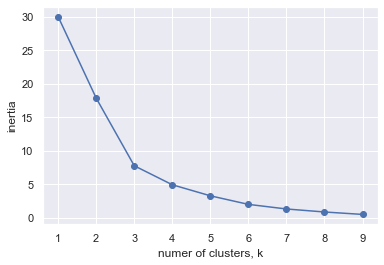

In [ ]:
plt.plot(ks, inertias, '-o')
plt.xlabel('numer of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

#### --> 6 clusters

In [ ]:
import random
model=KMeans(n_clusters=6, random_state = 17)

In [ ]:
model.fit(scaled_df)

KMeans(n_clusters=6, random_state=17)

In [ ]:
labels=model.predict(scaled_df)
labels

array([1, 0, 3, 3, 1, 4, 5, 2, 3, 2, 3, 4, 1, 3, 3])

In [ ]:
#add labels to original data set
df_3=df_1.copy()
df_3['label']=labels
df_3

,name,customer,estimated availability,latitude,longitude,label
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 17:17:00,43.6564,-79.3860,1
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 17:49:00,43.6683,-79.4205,0
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 18:17:00,43.6572,-79.3783,3
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 17:53:00,43.6513,-79.3756,3
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 17:24:00,43.6541,-79.3978,1
5,Downtown Toronto (Rosedale),Downtown Toronto (CN Tower / King and Spadina ...,2022-04-02 19:35:00,43.6827,-79.3730,4
6,Downtown Toronto (Regent Park / Port of Toronto),Downtown Toronto (Toronto Dominion Centre / De...,2022-04-02 18:21:00,43.6555,-79.3626,5
7,Downtown Toronto (St. James Town / Cabbagetown),York (Runnymede / The Junction North),2022-04-02 17:10:00,43.6684,-79.3689,2
8,Downtown Toronto (Underground city),Central Toronto (Summerhill West / Rathnelly /...,2022-04-02 17:21:00,43.6492,-79.3823,3
9,Downtown Toronto (Church and Wellesley),East Toronto (The Danforth West / Riverdale),2022-04-02 19:21:00,43.6656,-79.3830,2


In [ ]:
#find the center of each cluster
df_4=df_3.groupby(['label']).agg({'latitude': 'mean','longitude':'mean'})
df_4.reset_index()

,label,latitude,longitude
0,0,43.66830,-79.420500
1,1,43.65780,-79.394167
2,2,43.66700,-79.375950
3,3,43.65165,-79.378450
4,4,43.68270,-79.373000
5,5,43.65550,-79.362600


In [ ]:
#find drivers' long lat
dfDrivers_2=dfDrivers.copy()
dfDrivers_2=dfDrivers_2.rename(columns={'start region':'name'})
dfDrivers_2=pd.merge(dfDrivers_2,dfRegions[['name','latitude','longitude']],on='name',how='left')
dfDrivers_2

,name,velocity,latitude,longitude
0,Downtown Toronto (Richmond / Adelaide / King),20,43.6496,-79.3833
1,Downtown Toronto (St. James Park),20,43.6513,-79.3756
2,Downtown Toronto (Church and Wellesley),20,43.6656,-79.3830
3,Downtown Toronto (Christie),20,43.6683,-79.4205
4,Downtown Toronto (Church and Wellesley),20,43.6656,-79.3830
5,Downtown Toronto Stn A PO Boxes 25 The Esplana...,20,43.6437,-79.3787
6,Downtown Toronto (CN Tower / King and Spadina ...,20,43.6404,-79.3995
7,Downtown Toronto (Rosedale),20,43.6827,-79.3730
8,Downtown Toronto (University of Toronto / Harb...,20,43.6629,-79.3987
9,Downtown Toronto (Ryerson),20,43.6572,-79.3783


In [ ]:
!pip install geopy

In [ ]:
#calculate the distance
import geopy.distance

dfDrivers_2['c1']=0
dfDrivers_2['c2']=0
dfDrivers_2['c3']=0
dfDrivers_2['c4']=0
dfDrivers_2['c5']=0
dfDrivers_2['c6']=0

In [ ]:
for i in range(6):
    for j in range(len(dfDrivers_2['name'])):
        coords_1 = (df_4.loc[i,'latitude'], df_4.loc[i,'longitude'])
        coords_2 = (dfDrivers_2.loc[j,'latitude'], dfDrivers_2.loc[j,'longitude'])
        dfDrivers_2.iloc[[j],[i+4]]=geopy.distance.geodesic(coords_1, coords_2).km
        #print(k)

#dfDrivers_2.iloc[[j],[i+4]]=
#print geopy.distance.geodesic(coords_1, coords_2).km

In [ ]:
dfDrivers_2

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
0,Downtown Toronto (Richmond / Adelaide / King),20,43.6496,-79.3833,3.649792,1.264324,2.022108,0.452740,3.770261,1.793980
1,Downtown Toronto (St. James Park),20,43.6513,-79.3756,4.084700,1.662793,1.744586,0.233187,3.495017,1.147864
2,Downtown Toronto (Church and Wellesley),20,43.6656,-79.3830,3.039346,1.249926,0.589505,1.592786,2.063978,1.991720
3,Downtown Toronto (Christie),20,43.6683,-79.4205,0.000000,2.423305,3.595973,3.863542,4.151201,4.881962
4,Downtown Toronto (Church and Wellesley),20,43.6656,-79.3830,3.039346,1.249926,0.589505,1.592786,2.063978,1.991720
5,Downtown Toronto Stn A PO Boxes 25 The Esplana...,20,43.6437,-79.3787,4.340537,2.002783,2.598246,0.883518,4.357443,1.845525
6,Downtown Toronto (CN Tower / King and Spadina ...,20,43.6404,-79.3995,3.532552,1.980539,3.513359,2.108724,5.163019,3.417234
7,Downtown Toronto (Rosedale),20,43.6827,-79.3730,4.151201,3.250817,1.760510,3.477724,0.000000,3.136316
8,Downtown Toronto (University of Toronto / Harb...,20,43.6629,-79.3987,1.857830,0.674384,1.890627,2.056855,3.022447,3.025810
9,Downtown Toronto (Ryerson),20,43.6572,-79.3783,3.620347,1.281638,1.105211,0.616754,2.865260,1.280490


#### For each cluster get the top two closet drivers if there are more than three restaurants in the cluster, other wise, get one 

In [ ]:
if (labels == 0).sum() <= 3:
    print(dfDrivers_2['c1'].nsmallest(1))
else:
    print(dfDrivers_2['c1'].nsmallest(2))

3    0.0
Name: c1, dtype: float64


In [ ]:
if (labels == 1).sum() <= 3:
    print(dfDrivers_2['c2'].nsmallest(1))
else:
    print(dfDrivers_2['c2'].nsmallest(3))

8    0.674384
Name: c2, dtype: float64


In [ ]:
if (labels == 2).sum() <= 3:
    print(dfDrivers_2['c3'].nsmallest(1))
else:
    print(dfDrivers_2['c3'].nsmallest(2))

2    0.589505
Name: c3, dtype: float64


In [ ]:
if (labels == 3).sum() <= 3:
    print(dfDrivers_2['c4'].nsmallest(1))
else:
    print(dfDrivers_2['c4'].nsmallest(2))

1    0.233187
0    0.452740
Name: c4, dtype: float64


In [ ]:
if (labels == 4).sum() <= 3:
    print(dfDrivers_2['c5'].nsmallest(1))
else:
    print(dfDrivers_2['c5'].nsmallest(2))

7    0.0
Name: c5, dtype: float64


In [ ]:
if (labels == 5).sum() <= 3:
    print(dfDrivers_2['c6'].nsmallest(2))
else:
    print(dfDrivers_2['c6'].nsmallest(2))

1    1.147864
9    1.280490
Name: c6, dtype: float64


#### Going to use driver 3 for cluster 0; driver 8 for cluster 1; driver 2 for cluster 2; drivers 1,0 for cluster 3; driver 7  for cluster 4；driver 9 for cluster 5

This is because cluster 3 has the biggest number of restaurants. Other clusters only have 1-3 restaurants

below are driver table created 

In [ ]:
dfDrivers_cluster0 = dfDrivers_2.loc[[3]]
dfDrivers_cluster0

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
3,Downtown Toronto (Christie),20,43.6683,-79.4205,0.0,2.423305,3.595973,3.863542,4.151201,4.881962


In [ ]:
dfDrivers_cluster1 = dfDrivers_2.loc[[8]]
dfDrivers_cluster1

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
8,Downtown Toronto (University of Toronto / Harb...,20,43.6629,-79.3987,1.85783,0.674384,1.890627,2.056855,3.022447,3.02581


In [ ]:
dfDrivers_cluster2 = dfDrivers_2.loc[[2]]
dfDrivers_cluster2

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
2,Downtown Toronto (Church and Wellesley),20,43.6656,-79.383,3.039346,1.249926,0.589505,1.592786,2.063978,1.99172


In [ ]:
dfDrivers_cluster3 = dfDrivers_2.loc[[1, 0]]
dfDrivers_cluster3

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
1,Downtown Toronto (St. James Park),20,43.6513,-79.3756,4.084700,1.662793,1.744586,0.233187,3.495017,1.147864
0,Downtown Toronto (Richmond / Adelaide / King),20,43.6496,-79.3833,3.649792,1.264324,2.022108,0.452740,3.770261,1.793980


In [ ]:
dfDrivers_cluster4 = dfDrivers_2.loc[[7]]
dfDrivers_cluster4

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
7,Downtown Toronto (Rosedale),20,43.6827,-79.373,4.151201,3.250817,1.76051,3.477724,0.0,3.136316


In [ ]:
dfDrivers_cluster5 = dfDrivers_2.loc[[9]]
dfDrivers_cluster5

,name,velocity,latitude,longitude,c1,c2,c3,c4,c5,c6
9,Downtown Toronto (Ryerson),20,43.6572,-79.3783,3.620347,1.281638,1.105211,0.616754,2.86526,1.28049


# Run Model by Clusters (Model from Part 3 will be used)

cluster_optiaml_distances will be created to store the optimal distance from each cluster

total_distance will be the total distance of three clusters

In [ ]:
cluster_optiaml_distances = []
total_distance = 0

### Create Orders table for each cluster

In [ ]:
#cluster 0
dfOrdersA=dfOrders.copy()
dfOrdersA['label']=labels
dfOrdersA=dfOrdersA[dfOrdersA['label']==0]
dfOrdersA=dfOrdersA.drop(columns=['label'])
dfOrdersA=dfOrdersA.rename(columns={'name':'restaurant'})
dfOrdersA=dfOrdersA.set_index('restaurant')

#cluster 1
dfOrdersB=dfOrders.copy()
dfOrdersB['label']=labels
dfOrdersB=dfOrdersB[dfOrdersB['label']==1]
dfOrdersB=dfOrdersB.drop(columns=['label'])
dfOrdersB=dfOrdersB.rename(columns={'name':'restaurant'})
dfOrdersB=dfOrdersB.set_index('restaurant')

#cluster 2
dfOrdersC=dfOrders.copy()
dfOrdersC['label']=labels
dfOrdersC=dfOrdersC[dfOrdersC['label']==2]
dfOrdersC=dfOrdersC.drop(columns=['label'])
dfOrdersC=dfOrdersC.rename(columns={'name':'restaurant'})
dfOrdersC=dfOrdersC.set_index('restaurant')

#cluster 3
dfOrdersD=dfOrders.copy()
dfOrdersD['label']=labels
dfOrdersD=dfOrdersD[dfOrdersD['label']==3]
dfOrdersD=dfOrdersD.drop(columns=['label'])
dfOrdersD=dfOrdersD.rename(columns={'name':'restaurant'})
dfOrdersD=dfOrdersD.set_index('restaurant')

#cluster 4
dfOrdersE=dfOrders.copy()
dfOrdersE['label']=labels
dfOrdersE=dfOrdersE[dfOrdersE['label']==4]
dfOrdersE=dfOrdersE.drop(columns=['label'])
dfOrdersE=dfOrdersE.rename(columns={'name':'restaurant'})
dfOrdersE=dfOrdersE.set_index('restaurant')

#cluster 5
dfOrdersF=dfOrders.copy()
dfOrdersF['label']=labels
dfOrdersF=dfOrdersF[dfOrdersF['label']==5]
dfOrdersF=dfOrdersF.drop(columns=['label'])
dfOrdersF=dfOrdersF.rename(columns={'name':'restaurant'})
dfOrdersF=dfOrdersF.set_index('restaurant')

In [ ]:
dfOrdersA

,customer,estimated availability
restaurant,,
Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM


## Initiliaze dictionaries and  functions to be used

In [ ]:
regions = list(dfRegions["name"].unique())

distancedictionary = {}
for i in regions:
    for j in regions:
        if i == j:
            distancedictionary[(i,j)] = float(0)
        else: 
            distancedictionary[(i,j)] = float(dfDistance[(dfDistance["origin"] == i)&(dfDistance["destination"] == j)]["distance"])

In [ ]:
#fucntion to calculate time difference in minutes
def getTimeDifference(TimeStart, TimeEnd):
    TimeStart = datetime.datetime.strptime(TimeStart, '%Y-%m-%d %H:%M %p')
    TimeEnd = datetime.datetime.strptime(TimeEnd, '%Y-%m-%d %H:%M %p')
    timeDiff = TimeEnd - TimeStart
    return timeDiff.total_seconds() / 60

In [ ]:
#initialie model and objective sense

def initializeModel():
    """initialize part 4 model"""
    flowModel = pulp.LpProblem(name="Part 4 Solution", sense=pulp.LpMinimize)
    return flowModel

In [ ]:
def createOneDriverConstraints(flowModel, W):
    """create constraints for part 4 model"""
    #update startarc
    
    #Constraint: every location must be visited once
    for j in endarc:
        flowModel+= pulp.lpSum( [xvar[i,j,t] for i in startarc for t in steps]) ==1

    #Constraint: conservation of flow (go to node j in step t then start at node j in step t+1) 
    for t in steps[:-1]:
        for j in endarc:
            flowModel += (pulp.lpSum([xvar[(i, j, t)]] for i in startarc) == pulp.lpSum([xvar[(j, k, t+1)]] for k in endarc))


    # during the first step downtown rosedale has an outflow of 1, others are zero
    flowModel += pulp.lpSum([xvar[(0, j, 1)] for j in endarc]) == 1
    for i in startarc:
        if i != 0:
            flowModel += pulp.lpSum([xvar[(i, j, 1)]  for j in endarc]) == 0

    #Constraint: precedence must occur (must pick up food before dropping off at customer)
    for t in steps:
        for j in endarc:
            if j > len(customers):
                if t == 1:
                    flowModel += pulp.lpSum(xvar[i, j, t] for i in startarc) == 0 
                else:
                    flowModel += pulp.lpSum(xvar[(i, j, t)] for i in startarc) <= pulp.lpSum(xvar[(i, j-len(customers), past_t)] for i in startarc for past_t in steps[:t-1])

    ## Constraints added for part 2
    #Constraint: the first step downtown rosedale to the first restaurant has timestamp equal to the restaurant's ready time.
    flowModel += dvar[1] == pulp.lpSum([order_availability[j-1] * xvar[(0,j,1)]] for j in endarc if j <= len(customers))

    #set time at each step based on the distance and the speed 20km/h
    for v in drivers:
        for t in steps:
            if t != 1:
                for j in endarc:
                    for i in endarc:
                        if i > len(customers):
                            #add 5 mins since leaving from customers
                            flowModel += dvar[t] >= (dvar[t-1] + pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] / driversVelocity[v] * 60 * xvar[(i, j, t)]]
                                                                  + (5 * xvar[(i,j,t)]))) 
                        else:
                            #leave time must be greater than last timestamp + travel time
                            flowModel += dvar[t] >= dvar[t-1] + pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] / driversVelocity[v] * 60 * xvar[(i, j, t)]])

                            #leave time must be greater than order ready time + travel time
                            flowModel += dvar[t] >= pulp.lpSum(xvar[(i,j,t)] * order_availability[i-1]) + pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] / driversVelocity[v] * 60 * xvar[(i, j, t)]])

    #Constraint: average wating time < W (W=120minuets)
    u = 999999
    for j in endarc:
        if j > len(customers):
            for t in steps:
                for i in startarc:
                    flowModel += wvar[j] >= 0
                    flowModel += wvar[j] >= dvar[t] - order_availability[(j-len(customers)-1)] - u*(1 - xvar[(i, j, t)])
                    flowModel += wvar[j] <= dvar[t] - order_availability[(j-len(customers)-1)] + u*(1 - xvar[(i, j, t)])

    flowModel += pulp.lpSum([wvar[j] for j in range(len(customers) + 1, len(endarc) + 1)]) / len(customers) <= W


In [ ]:
def createMultipleDriverConstraints(flowModel, W):
    """create constraints for part 4 model"""
    #Constraint: every location must be visited by exactly one vehicle
    for j in endarc:
        flowModel+= pulp.lpSum( [xvar[i,j,v,t] for v in drivers for i in ([v] + startarc) for t in steps]) == 1


    #Constraint: conservation of flow (go to node j in step t then start at node j in step t+1) 
    for v in drivers:
        for t in steps[:-1]:
            for j in endarc:
                flowModel += (pulp.lpSum([xvar[(i,j,v,t)]] for i in ([v] + startarc)) == pulp.lpSum([xvar[(j, k, v, t+1)]] for k in endarc))

    # during the first step downtown rosedale has an outflow of 1, others are zero
    # drivers can't all start at step 1 now since there are 3 drivers
    for v in drivers:
        flowModel += pulp.lpSum([xvar[(v, j, v, t)] for j in endarc for t in steps]) == 1
    for v in drivers:
        for i in ([v] + startarc):
            flowModel += pulp.lpSum([xvar[(i, j, v, 1)]  for j in endarc]) == 0

    #Constraint: precedence must occur (must pick up food before dropping off at customer)
    for v in drivers:
        for t in steps:
            for j in endarc:
                if j >= len(drivers + customers): #if arriving at customers' location
                    flowModel += pulp.lpSum(xvar[(i, j, v, t)] for i in ([v] + startarc)) <= pulp.lpSum(xvar[(i, j-len(customers), v, past_t)] for i in ([v] + startarc) for past_t in steps[:t-1])                  

    ## Constraints added for part 2
    #Constraint: the arrival at the first restaurant has timestamp equal to the restaurant's ready time.
    for v in drivers:
        for t in steps:
            flowModel += dvar[t, v] >= pulp.lpSum([order_availability[j-len(drivers)] * xvar[(0,j,v,t)]] for j in endarc if j < len(drivers + customers))

    #set time at each step based on the distance and the speed 40km/h
    for v in drivers:
        for t in steps:
            if t != 1:
                for j in endarc:
                    for i in startarc:
                        if i >= len(drivers + customers):
                            #add 5 mins since leaving from customers
                            flowModel += dvar[t, v] >= (dvar[t-1, v] + pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] / driversVelocity[v] * 60 * xvar[(i, j, v, t)]]
                                                                  + (5 * xvar[(i,j,v,t)]))) 
                        else:
                            #leave time must be greater than last timestamp + travel time
                            flowModel += dvar[t, v] >= dvar[t-1, v] + pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] / driversVelocity[v] * 60 * xvar[(i, j, v, t)]])

                            #leave time must be greater than order ready time + travel time
                            flowModel += dvar[t, v] >= pulp.lpSum(xvar[(i,j,v,t)] * order_availability[i-len(drivers)]) + pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] / driversVelocity[v] * 60 * xvar[(i, j, v, t)]])

    #Constraint: average wating time < W (W=60minuets)
    u = 999999
    for v in drivers:
        for j in endarc:
            if j >= len(drivers + customers):
                for t in steps:
                    for i in ([v] + startarc):
                        flowModel += wvar[j] >= 0
                        flowModel += wvar[j] >= dvar[t, v] - order_availability[(j-len(customers)-len(drivers))] - u*(1 - xvar[(i, j, v, t)])
                        flowModel += wvar[j] <= dvar[t, v] - order_availability[(j-len(customers)-len(drivers))] + u*(1 - xvar[(i, j, v, t)])

    flowModel += pulp.lpSum([wvar[j] for j in range(len(drivers + customers), len(rescustlist))]) / len(customers) <= W

In [ ]:
def addOneDriverObjective(flowModel):
    """add objetive for part4 model"""
    objective=0
    for i in startarc:
        for j in endarc:
            if i != j:
                objective += pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] * xvar[(i, j, t)] for t in steps])
                
    flowModel+=objective

In [ ]:
def addObjective(flowModel):
    """add objetive for part4 model"""
    objective=0
    for v in drivers:
        for i in ([v] + startarc):
            for j in endarc:
                if i != j:
                    objective += pulp.lpSum([distancedictionary[(rescustlist[i],rescustlist[j])] * xvar[(i, j, v, t)] for t in steps])

    flowModel+=objective

## Use for loop to run the model on each cluster

In [ ]:
cluster_optiaml_distances = []
total_distance = 0
wait_times = []
W = 120 #set W

for i in range(6):
    
    print ('Running model on cluster ' + str(i))
    
    #assign orders and drivers table for different clusters ------------------------------------------
    if i == 0:
        dfOrders_new = dfOrdersA
        dfDrivers_new = dfDrivers_cluster0
    elif i == 1:
        dfOrders_new = dfOrdersB
        dfDrivers_new = dfDrivers_cluster1
    elif i == 2:
        dfOrders_new = dfOrdersC
        dfDrivers_new = dfDrivers_cluster2
    elif i == 3:
        dfOrders_new = dfOrdersD
        dfDrivers_new = dfDrivers_cluster3
    elif i == 4:
        dfOrders_new = dfOrdersE
        dfDrivers_new = dfDrivers_cluster4
    elif i == 5:
        dfOrders_new = dfOrdersF
        dfDrivers_new = dfDrivers_cluster5
    
    
    
    if len(list(dfDrivers_new['name'])) > 1:
        #sets-------------------------------------------

        #restaurants
        restaurants= list(dfOrders_new.index)

        #customers
        customers=list(dfOrders_new['customer'])

        #number of trips
        numtrips=len((customers+restaurants))

        #estimated availability for orders
        order_availability = [getTimeDifference('2022-04-02 0:00 AM', item) for item in list(dfOrders_new['estimated availability'])]

        #drivers start region
        driversStartRegion =list(dfDrivers_new['name'])

        #drivers speed per minute
        driversVelocity = list(dfDrivers_new['velocity'])

        #drivers list
        drivers = list(range(len(driversStartRegion)))

        #restaurant-customer list
        rescustlist=driversStartRegion+restaurants+customers

        #steps
        steps = list(range(1, len(rescustlist)-len(drivers)+1))

        #starting points
        startarc = list(range(len(drivers), len(rescustlist)))

        #ending points
        endarc = startarc.copy()


        # Run Model --------------------------------------------------------------
        
        #variables: if driver v travelling from resteurant i to customer j at step t
        xvar = pulp.LpVariable.dict("x", (drivers + startarc, endarc, drivers, steps), cat=pulp.LpBinary)

        #variable: total travel time at each step for each driver
        dvar = pulp.LpVariable.dict("d", (steps, drivers), cat=pulp.LpContinuous)

        #variable: wait time for each customer 
        wvar = pulp.LpVariable.dict("w", (endarc), cat=pulp.LpContinuous)

        flowModel = initializeModel() #initialize model
        createMultipleDriverConstraints(flowModel, W) #create constraints
        addMultipleDriverObjective(flowModel) #add objective

        # Solve model
        flowModel.solve(pulp.PULP_CBC_CMD(timeLimit=150))
        print("Status:", pulp.LpStatus[flowModel.status])
        print("Time elapsed:", flowModel.solutionTime)
        
        #Print Solution ----------------------------------------
        print("Total distance:" + str(pulp.value(flowModel.objective))+'\n')

        for v in drivers:
            print(f'Driver: {drivers[v] + 1}')
            for t in steps:
                print('step ' + str(t))
                for i in (drivers + startarc):
                    for j in endarc:
                        if xvar[i,j,v,t].varValue and xvar[i,j,v,t].varValue >= 1.0:
                            if j < len(drivers + customers):
                                if i < len(drivers):
                                    print(f'Driving from {rescustlist[v]} To \n{rescustlist[j]} for pickup')
                                else:
                                    print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for pickup')
                            else:
                                print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for delivery') 
                                print(f'Customer wait time is {wvar[j].varValue} minutes')
                                wait_times.append(wvar[j].varValue)
                print() 
    
    else:
        #sets-------------------------------------------

        #restaurants
        restaurants= list(dfOrders_new.index)

        #customers
        customers=list(dfOrders_new['customer'])

        #number of trips
        numtrips=len((customers+restaurants))

        #estimated availability for orders
        order_availability = [getTimeDifference('2022-04-02 0:00 AM', item) for item in list(dfOrders_new['estimated availability'])]

        #drivers start region
        driversStartRegion =list(dfDrivers_new['name'])

        #drivers speed per minute
        driversVelocity = list(dfDrivers_new['velocity'])

        #drivers list
        drivers = list(range(len(driversStartRegion)))

        #restaurant-customer list
        rescustlist=driversStartRegion+restaurants+customers

        #steps
        steps = list(range(1, len(rescustlist)))

        #starting points
        startarc = list(range(len(rescustlist)))

        #ending points
        endarc = steps.copy()
        
        #variables: if driver travelling from resteurant i to customer j at step t
        xvar = pulp.LpVariable.dict("x", (startarc, endarc, steps), cat=pulp.LpBinary)

        #variable: total travel time at each step for each driver
        dvar = pulp.LpVariable.dict("d", (steps), cat=pulp.LpContinuous)

        #variable: wait time for each customer 
        wvar = pulp.LpVariable.dict("w", (endarc), cat=pulp.LpContinuous)

        flowModel = initializeModel() #initialize model
        createOneDriverConstraints(flowModel, W) #create constraints
        addOneDriverObjective(flowModel) #add objective

        # Solve model
        flowModel.solve(pulp.PULP_CBC_CMD(timeLimit=150))
        print("Status:", pulp.LpStatus[flowModel.status])
        print("Time elapsed:", flowModel.solutionTime)
        
        # Print solution -------------------
        print("Total distance:" + str(pulp.value(flowModel.objective))+'\n')

        for t in steps:
            print(t)
            for i in startarc:
                for j in endarc:
                    if xvar[i,j,t].varValue >= 1.0:
                        if j <= len(customers):
                            print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for pickup')
                        else:
                            print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for delivery') 
                            print(f'Customer wait time is {wvar[(j)].varValue} minutes')
                            wait_times.append(wvar[j].varValue)
            print()  
    
     
    
    # Store Distance information -------------------------------
    cluster_optiaml_distances.append(pulp.value(flowModel.objective))
    total_distance += pulp.value(flowModel.objective)
    

Running model on cluster 0
Status: Optimal
Time elapsed: 0.03391265869140625
Total distance:3.4240960245910577

1
Driving from Downtown Toronto (Christie) To 
Downtown Toronto (Christie) for pickup

2
Driving from Downtown Toronto (Christie) To 
West Toronto (Brockton / Parkdale Village / Exhibition Place) for delivery
Customer wait time is 10.272288 minutes

Running model on cluster 1
Status: Optimal
Time elapsed: 0.312716007232666
Total distance:22.635589136873666

1
Driving from Downtown Toronto (University of Toronto / Harbord) To 
Downtown Toronto (University of Toronto / Harbord) for pickup

2
Driving from Downtown Toronto (University of Toronto / Harbord) To 
Downtown Toronto (Kensington Market / Chinatown / Grange Park) for pickup

3
Driving from Downtown Toronto (Kensington Market / Chinatown / Grange Park) To 
Downtown Toronto (Central Bay Street) for delivery
Customer wait time is 90.893057 minutes

4
Driving from Downtown Toronto (Central Bay Street) To 
Downtown Toronto (C

In [ ]:
cluster_optiaml_distances

[3.4240960245910577,
 22.635589136873666,
 13.452678867822758,
 20.754556218835834,
 5.190227351163807,
 3.128229542486113]

### Total Distance Travelled:

In [ ]:
total_distance

68.58537714177324

### Average Wait Time:

In [ ]:
sum(wait_times)/len(wait_times)

67.5944847

# Apply this Clustering Method on part3_small

In [ ]:
dfOrders=pd.read_csv('part3_small.csv')
dfDrivers=pd.read_csv('part3_drivers.csv')

In [ ]:
dfOrders

,restaurant,customer,estimated availability
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 5:17 PM
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 6:17 PM
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 5:53 PM
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 5:24 PM


In [ ]:
dfDrivers

,start region,velocity
0,Downtown Toronto (Richmond / Adelaide / King),40
1,Downtown Toronto (St. James Park),35
2,Downtown Toronto (Church and Wellesley),32


### K Mean Clustering

In [ ]:
#find the long lat for each restaurant in the orders
df_1=dfOrders.copy()
df_1=df_1.rename(columns={'restaurant':'name'})
df_1=pd.merge(df_1,dfRegions[['name','latitude','longitude']],on='name',how='left')
df_1

,name,customer,estimated availability,latitude,longitude
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 5:17 PM,43.6564,-79.3860
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 5:49 PM,43.6683,-79.4205
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 6:17 PM,43.6572,-79.3783
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 5:53 PM,43.6513,-79.3756
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 5:24 PM,43.6541,-79.3978


In [ ]:
df_1['estimated availability'] = pd.to_datetime(df_1['estimated availability'])
df_1

,name,customer,estimated availability,latitude,longitude
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 17:17:00,43.6564,-79.3860
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 17:49:00,43.6683,-79.4205
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 18:17:00,43.6572,-79.3783
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 17:53:00,43.6513,-79.3756
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 17:24:00,43.6541,-79.3978


In [ ]:
df_2=df_1.copy()
df_2=df_2.drop(columns=['name','customer','estimated availability'])

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_2)
#Converting the numpy array into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head(5)

,0,1
0,0.300000,0.768374
1,1.000000,0.000000
2,0.347059,0.939866
3,0.000000,1.000000
4,0.164706,0.505568


In [ ]:
scaled_df.columns=['latitude','longitude']

In [ ]:
x_array = scaled_df.values
x_array

array([[0.3       , 0.76837416],
       [1.        , 0.        ],
       [0.34705882, 0.93986637],
       [0.        , 1.        ],
       [0.16470588, 0.50556793]])

In [ ]:
ks = range(1,6)
inertias = []
centroids = []
scaler = StandardScaler()

In [ ]:
for k in ks:
    model = KMeans(n_clusters = k)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(scaled_df)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    centroids.append(pipeline.named_steps['kmeans'].cluster_centers_)

Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x21ceb804d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

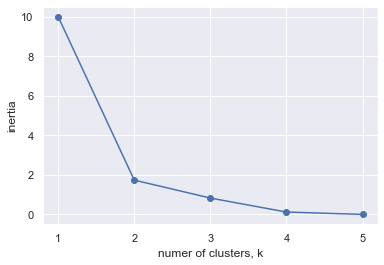

In [ ]:
plt.plot(ks, inertias, '-o')
plt.xlabel('numer of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

#### --> 2 clusters

In [ ]:
model=KMeans(n_clusters=2, random_state=1)

In [ ]:
model.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [ ]:
labels=model.predict(scaled_df)
labels

array([0, 1, 0, 0, 0])

In [ ]:
#add labels to original data set
df_3=df_1.copy()
df_3['label']=labels
df_3

,name,customer,estimated availability,latitude,longitude,label
0,Downtown Toronto (Central Bay Street),North York (Armour Heights / Wilson Heights / ...,2022-04-02 17:17:00,43.6564,-79.3860,0
1,Downtown Toronto (Christie),West Toronto (Brockton / Parkdale Village / Ex...,2022-04-02 17:49:00,43.6683,-79.4205,1
2,Downtown Toronto (Ryerson),York (Fairbank / Oakwood),2022-04-02 18:17:00,43.6572,-79.3783,0
3,Downtown Toronto (St. James Park),East Toronto (The Beaches),2022-04-02 17:53:00,43.6513,-79.3756,0
4,Downtown Toronto (Kensington Market / Chinatow...,Downtown Toronto (Central Bay Street),2022-04-02 17:24:00,43.6541,-79.3978,0


In [ ]:
#find the center of each cluster
df_4=df_3.groupby(['label']).agg({'latitude': 'mean','longitude':'mean'})
df_4.reset_index()

,label,latitude,longitude
0,0,43.65475,-79.384425
1,1,43.66830,-79.420500


In [ ]:
#find drivers' long lat
dfDrivers_2=dfDrivers.copy()
dfDrivers_2=dfDrivers_2.rename(columns={'start region':'name'})
dfDrivers_2=pd.merge(dfDrivers_2,dfRegions[['name','latitude','longitude']],on='name',how='left')
dfDrivers_2

,name,velocity,latitude,longitude
0,Downtown Toronto (Richmond / Adelaide / King),40,43.6496,-79.3833
1,Downtown Toronto (St. James Park),35,43.6513,-79.3756
2,Downtown Toronto (Church and Wellesley),32,43.6656,-79.3830


In [ ]:
#calculate the distance
dfDrivers_2['c1']=0
dfDrivers_2['c2']=0

In [ ]:
for i in range(2):
    for j in range(len(dfDrivers_2['name'])):
        coords_1 = (df_4.loc[i,'latitude'], df_4.loc[i,'longitude'])
        coords_2 = (dfDrivers_2.loc[j,'latitude'], dfDrivers_2.loc[j,'longitude'])
        dfDrivers_2.iloc[[j],[i+4]]=geopy.distance.geodesic(coords_1, coords_2).km
        #print(k)

#dfDrivers_2.iloc[[j],[i+4]]=
#print geopy.distance.geodesic(coords_1, coords_2).km

In [ ]:
dfDrivers_2

,name,velocity,latitude,longitude,c1,c2
0,Downtown Toronto (Richmond / Adelaide / King),40,43.6496,-79.3833,0.579346,3.649792
1,Downtown Toronto (St. James Park),35,43.6513,-79.3756,0.808564,4.084700
2,Downtown Toronto (Church and Wellesley),32,43.6656,-79.3830,1.210963,3.039346


#### For each cluster get the top two closet drivers if there are more than two restaurants in the cluster, other wise, get one 

In [ ]:
if (labels == 0).sum() < 2:
    print(dfDrivers_2['c1'].nsmallest(1))
else:
    print(dfDrivers_2['c1'].nsmallest(2))

0    0.579346
1    0.808564
Name: c1, dtype: float64


In [ ]:
if (labels == 1).sum() < 2:
    print(dfDrivers_2['c2'].nsmallest(1))
else:
    print(dfDrivers_2['c2'].nsmallest(2))

2    3.039346
Name: c2, dtype: float64


#### Going to use drivers 0,1 for cluster 0; drivers 2 for cluster 1

below are driver table created for each cluster

In [ ]:
dfDrivers_cluster0 = dfDrivers_2.loc[[0,1]]
dfDrivers_cluster0

,name,velocity,latitude,longitude,c1,c2
0,Downtown Toronto (Richmond / Adelaide / King),40,43.6496,-79.3833,0.579346,3.649792
1,Downtown Toronto (St. James Park),35,43.6513,-79.3756,0.808564,4.084700


In [ ]:
dfDrivers_cluster1 = dfDrivers_2.loc[[2]]
dfDrivers_cluster1

,name,velocity,latitude,longitude,c1,c2
2,Downtown Toronto (Church and Wellesley),32,43.6656,-79.383,1.210963,3.039346


# Run Model by Clusters (Model from Part 3 will be used)

cluster_optiaml_distances will be created to store the optimal distance from each cluster

total_distance will be the total distance of three clusters

In [ ]:
cluster_optiaml_distances = []
total_distance = 0

### Create Orders table for each cluster

In [ ]:
#cluster 0
dfOrdersA=dfOrders.copy()
dfOrdersA['label']=labels
dfOrdersA=dfOrdersA[dfOrdersA['label']==0]
dfOrdersA=dfOrdersA.drop(columns=['label'])
dfOrdersA=dfOrdersA.rename(columns={'name':'restaurant'})
dfOrdersA=dfOrdersA.set_index('restaurant')

#cluster 1
dfOrdersB=dfOrders.copy()
dfOrdersB['label']=labels
dfOrdersB=dfOrdersB[dfOrdersB['label']==1]
dfOrdersB=dfOrdersB.drop(columns=['label'])
dfOrdersB=dfOrdersB.rename(columns={'name':'restaurant'})
dfOrdersB=dfOrdersB.set_index('restaurant')

## Use for loop to run the model on each cluster (functions are created earlier)

In [ ]:
cluster_optiaml_distances = []
total_distance = 0
wait_times = []
W = 120 #set W

for i in range(2):
    
    print ('Running model on cluster ' + str(i))
    
    #assign orders and drivers table for different clusters ------------------------------------------
    if i == 0:
        dfOrders_new = dfOrdersA
        dfDrivers_new = dfDrivers_cluster0
    elif i == 1:
        dfOrders_new = dfOrdersB
        dfDrivers_new = dfDrivers_cluster1
    
    
    if len(list(dfDrivers_new['name'])) > 1:
        #sets-------------------------------------------

        #restaurants
        restaurants= list(dfOrders_new.index)

        #customers
        customers=list(dfOrders_new['customer'])

        #number of trips
        numtrips=len((customers+restaurants))

        #estimated availability for orders
        order_availability = [getTimeDifference('2022-04-02 0:00 AM', item) for item in list(dfOrders_new['estimated availability'])]

        #drivers start region
        driversStartRegion =list(dfDrivers_new['name'])

        #drivers speed per minute
        driversVelocity = list(dfDrivers_new['velocity'])

        #drivers list
        drivers = list(range(len(driversStartRegion)))

        #restaurant-customer list
        rescustlist=driversStartRegion+restaurants+customers

        #steps
        steps = list(range(1, len(rescustlist)-len(drivers)+1))

        #starting points
        startarc = list(range(len(drivers), len(rescustlist)))

        #ending points
        endarc = startarc.copy()


        # Run Model --------------------------------------------------------------
        
        #variables: if driver v travelling from resteurant i to customer j at step t
        xvar = pulp.LpVariable.dict("x", (drivers + startarc, endarc, drivers, steps), cat=pulp.LpBinary)

        #variable: total travel time at each step for each driver
        dvar = pulp.LpVariable.dict("d", (steps, drivers), cat=pulp.LpContinuous)

        #variable: wait time for each customer 
        wvar = pulp.LpVariable.dict("w", (endarc), cat=pulp.LpContinuous)

        flowModel = initializeModel() #initialize model
        createMultipleDriverConstraints(flowModel, W) #create constraints
        addMultipleDriverObjective(flowModel) #add objective

        # Solve model
        flowModel.solve(pulp.PULP_CBC_CMD(timeLimit=150))
        print("Status:", pulp.LpStatus[flowModel.status])
        print("Time elapsed:", flowModel.solutionTime)
        
        #Print Solution ----------------------------------------
        print("Total distance:" + str(pulp.value(flowModel.objective))+'\n')

        for v in drivers:
            print(f'Driver: {drivers[v] + 1}')
            for t in steps:
                print('step ' + str(t))
                for i in (drivers + startarc):
                    for j in endarc:
                        if xvar[i,j,v,t].varValue and xvar[i,j,v,t].varValue >= 1.0:
                            if j < len(drivers + customers):
                                if i < len(drivers):
                                    print(f'Driving from {rescustlist[v]} To \n{rescustlist[j]} for pickup')
                                else:
                                    print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for pickup')
                            else:
                                print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for delivery') 
                                print(f'Customer wait time is {wvar[j].varValue} minutes')
                                wait_times.append(wvar[j].varValue)
                print() 
    
    else:
        #sets-------------------------------------------

        #resteurants
        restaurants= list(dfOrders_new.index)

        #customers
        customers=list(dfOrders_new['customer'])

        #number of trips
        numtrips=len((customers+restaurants))

        #estimated availability for orders
        order_availability = [getTimeDifference('2022-04-02 0:00 AM', item) for item in list(dfOrders_new['estimated availability'])]

        #drivers start region
        driversStartRegion =list(dfDrivers_new['name'])

        #drivers speed per minute
        driversVelocity = list(dfDrivers_new['velocity'])

        #drivers list
        drivers = list(range(len(driversStartRegion)))

        #resteurant-customer list
        rescustlist=driversStartRegion+restaurants+customers

        #steps
        steps = list(range(1, len(rescustlist)))

        #starting points
        startarc = list(range(len(rescustlist)))

        #ending points
        endarc = steps.copy()
        
        #variables: if driver travelling from resteurant i to customer j at step t
        xvar = pulp.LpVariable.dict("x", (startarc, endarc, steps), cat=pulp.LpBinary)

        #variable: total travel time at each step for each driver
        dvar = pulp.LpVariable.dict("d", (steps), cat=pulp.LpContinuous)

        #variable: wait time for each customer 
        wvar = pulp.LpVariable.dict("w", (endarc), cat=pulp.LpContinuous)

        flowModel = initializeModel() #initialize model
        createOneDriverConstraints(flowModel, W) #create constraints
        addOneDriverObjective(flowModel) #add objective

        # Solve model
        flowModel.solve(pulp.PULP_CBC_CMD(timeLimit=150))
        print("Status:", pulp.LpStatus[flowModel.status])
        print("Time elapsed:", flowModel.solutionTime)
        
        # Print solution -------------------
        print("Total distance:" + str(pulp.value(flowModel.objective))+'\n')

        for t in steps:
            print(t)
            for i in startarc:
                for j in endarc:
                    if xvar[i,j,t].varValue >= 1.0:
                        if j <= len(customers):
                            print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for pickup')
                        else:
                            print(f'Driving from {rescustlist[i]} To \n{rescustlist[j]} for delivery') 
                            print(f'Customer wait time is {wvar[(j)].varValue} minutes')
                            wait_times.append(wvar[j].varValue)
            print()  
    
     
    
    # Store Distance information -------------------------------
    cluster_optiaml_distances.append(pulp.value(flowModel.objective))
    total_distance += pulp.value(flowModel.objective)
    

Running model on cluster 0
Status: Optimal
Time elapsed: 2.0736026763916016
Total distance:24.08878431774695

Driver: 1
step 1

step 2

step 3
Driving from Downtown Toronto (Richmond / Adelaide / King) To 
Downtown Toronto (Kensington Market / Chinatown / Grange Park) for pickup

step 4
Driving from Downtown Toronto (Kensington Market / Chinatown / Grange Park) To 
Downtown Toronto (Central Bay Street) for pickup

step 5
Driving from Downtown Toronto (Central Bay Street) To 
Downtown Toronto (Central Bay Street) for delivery
Customer wait time is 1.4747411 minutes

step 6
Driving from Downtown Toronto (Central Bay Street) To 
Downtown Toronto (Ryerson) for pickup

step 7
Driving from Downtown Toronto (Ryerson) To 
York (Fairbank / Oakwood) for delivery
Customer wait time is 10.210002 minutes

step 8
Driving from York (Fairbank / Oakwood) To 
North York (Armour Heights / Wilson Heights / Downsview North) for delivery
Customer wait time is 85.993062 minutes

Driver: 2
step 1

step 2

ste

In [ ]:
cluster_optiaml_distances

[24.08878431774695, 6.455301548444373]

### Total Distance Travelled:

In [ ]:
total_distance

30.544085866191324

### Average Wait Time:

In [ ]:
sum(wait_times)/len(wait_times)

23.29333262